# Beaufort Gyre freshwater diagnoses

In [15]:
import glob
import datetime
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [30]:
def plot_Ba(time_step, ax):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    topox, topoy=proj(lon_arctic, lat_arctic)
    
    CS=proj.contourf(x, y, ptrc_obj.variables['Ba'][time_step, 0, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
    proj.contour(topox, topoy, topo_arctic, [500, 3500], colors=('gray',), linewidths=1.5)
    #proj.contour(x, y, ptrc_obj.variables['Ba'][time_step, L, :, :], lev1, linewidths=0.5, colors=('gray',))
    ax.set_title('Time: '+date_list[time_step].strftime("%Y-%m-%d"), fontsize=15)
    return CS, proj

In [ ]:
def plot_current(time):
    
    u = U[time, :, :]
    v = V[time, :, :]
    ax=fig.gca()
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    speed = np.sqrt(u*u + v*v)
    proj.streamplot(x, y, u, v, color=speed, cmap=plt.cm.jet, linewidth=0.25*speed)


In [40]:
for i in range(99):
    print('mv REMAP_Ba_UV_'+format(i, '02d')+'.mat '+'REMAP_Ba_UV_'+format(i, '03d')+'.mat')

mv REMAP_Ba_UV_00.mat REMAP_Ba_UV_000.mat
mv REMAP_Ba_UV_01.mat REMAP_Ba_UV_001.mat
mv REMAP_Ba_UV_02.mat REMAP_Ba_UV_002.mat
mv REMAP_Ba_UV_03.mat REMAP_Ba_UV_003.mat
mv REMAP_Ba_UV_04.mat REMAP_Ba_UV_004.mat
mv REMAP_Ba_UV_05.mat REMAP_Ba_UV_005.mat
mv REMAP_Ba_UV_06.mat REMAP_Ba_UV_006.mat
mv REMAP_Ba_UV_07.mat REMAP_Ba_UV_007.mat
mv REMAP_Ba_UV_08.mat REMAP_Ba_UV_008.mat
mv REMAP_Ba_UV_09.mat REMAP_Ba_UV_009.mat
mv REMAP_Ba_UV_10.mat REMAP_Ba_UV_010.mat
mv REMAP_Ba_UV_11.mat REMAP_Ba_UV_011.mat
mv REMAP_Ba_UV_12.mat REMAP_Ba_UV_012.mat
mv REMAP_Ba_UV_13.mat REMAP_Ba_UV_013.mat
mv REMAP_Ba_UV_14.mat REMAP_Ba_UV_014.mat
mv REMAP_Ba_UV_15.mat REMAP_Ba_UV_015.mat
mv REMAP_Ba_UV_16.mat REMAP_Ba_UV_016.mat
mv REMAP_Ba_UV_17.mat REMAP_Ba_UV_017.mat
mv REMAP_Ba_UV_18.mat REMAP_Ba_UV_018.mat
mv REMAP_Ba_UV_19.mat REMAP_Ba_UV_019.mat
mv REMAP_Ba_UV_20.mat REMAP_Ba_UV_020.mat
mv REMAP_Ba_UV_21.mat REMAP_Ba_UV_021.mat
mv REMAP_Ba_UV_22.mat REMAP_Ba_UV_022.mat
mv REMAP_Ba_UV_23.mat REMAP_Ba_UV_

In [36]:
names = sorted(glob.glob('../../_data/MAT files/REMAP_Ba_UV/*'))

In [37]:
names

['../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_00.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_01.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_02.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_03.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_04.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_05.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_06.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_07.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_08.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_09.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_10.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_100.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_101.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_102.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_103.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_104.mat',
 '../../_data/MAT files/REMAP_Ba_UV/REMAP_Ba_UV_105.mat',
 '../../_data/MAT files/R

In [17]:
ETOPO2_Arctic=scipy.io.loadmat('../../_libs/ETOPO2_Arctic.mat')
ETOPO2_CAA=scipy.io.loadmat('../../_libs/ETOPO2_CAA.mat')

#print(ETOPO2_Arctic)
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']

res_unit=3
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1 

In [3]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BARIUM01_1m_20020101_20140103_ptrc_T.nc'
ptrc_obj = nc.Dataset(FName)
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [4]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [5]:
L=0; lev1 = np.arange(35, 100, 5)

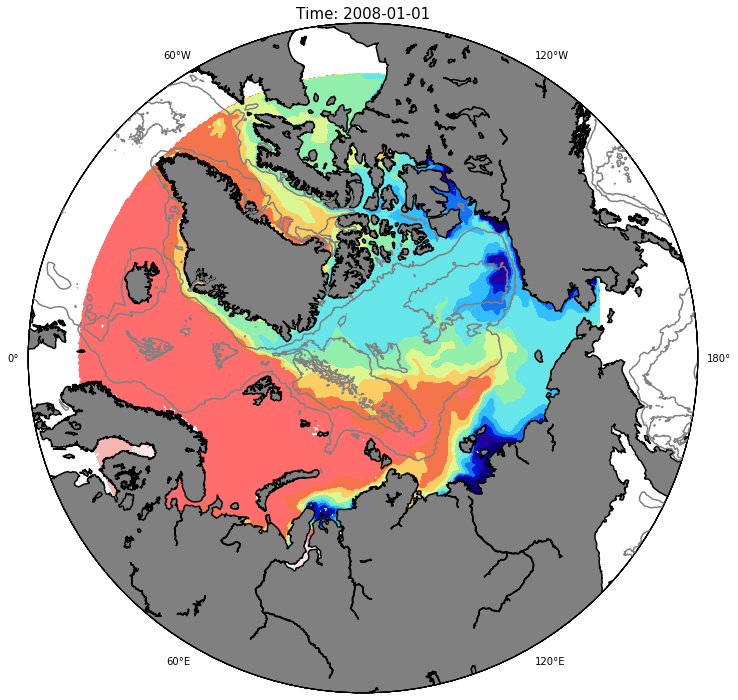

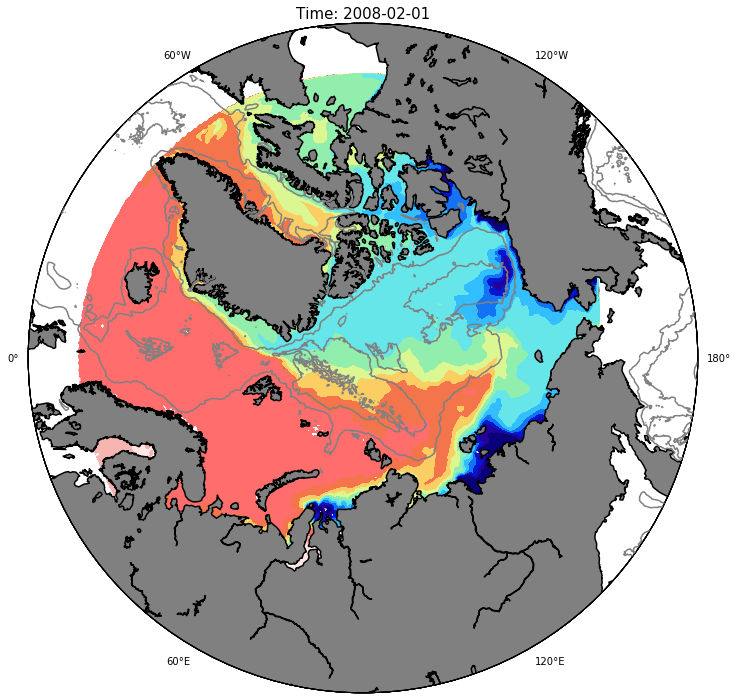

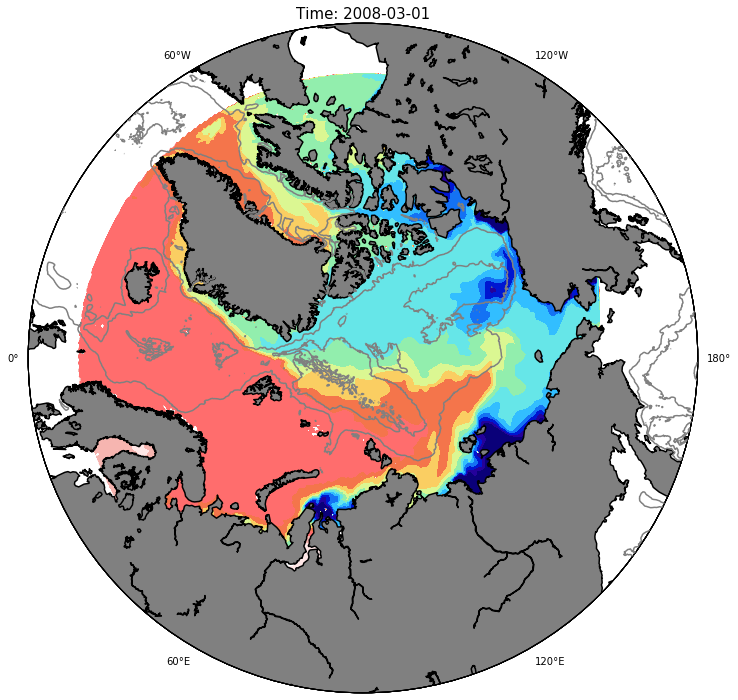

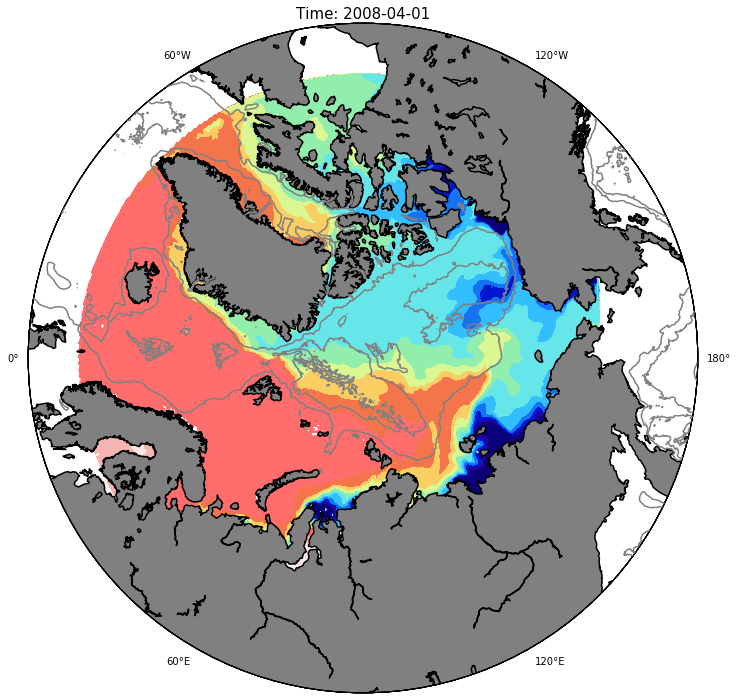

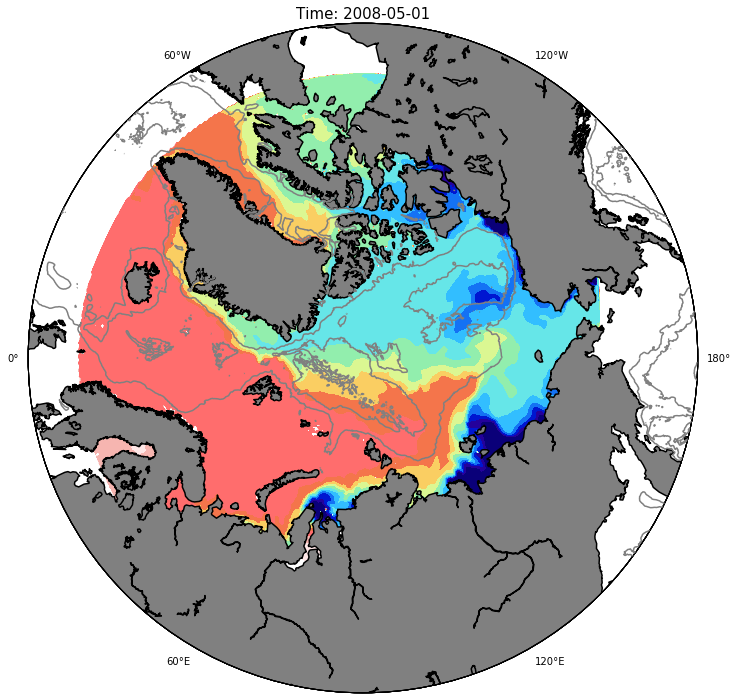

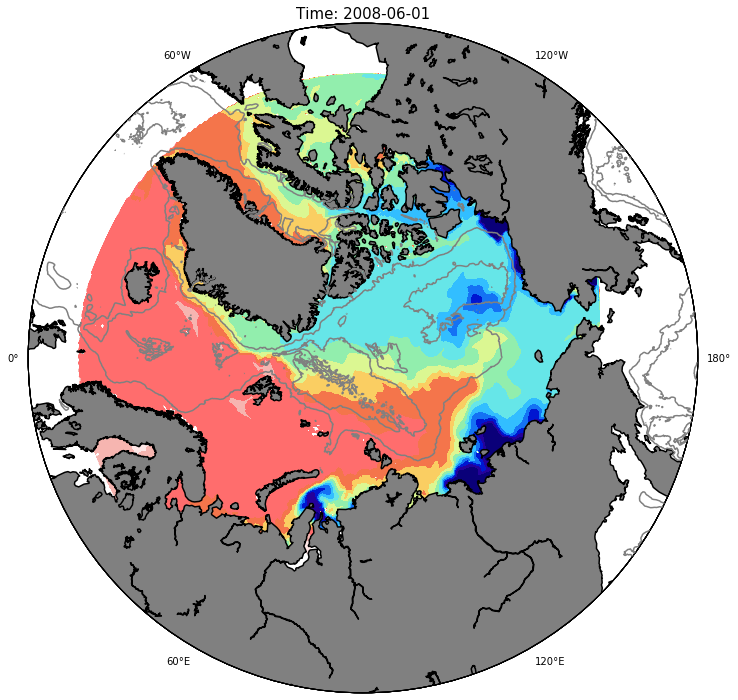

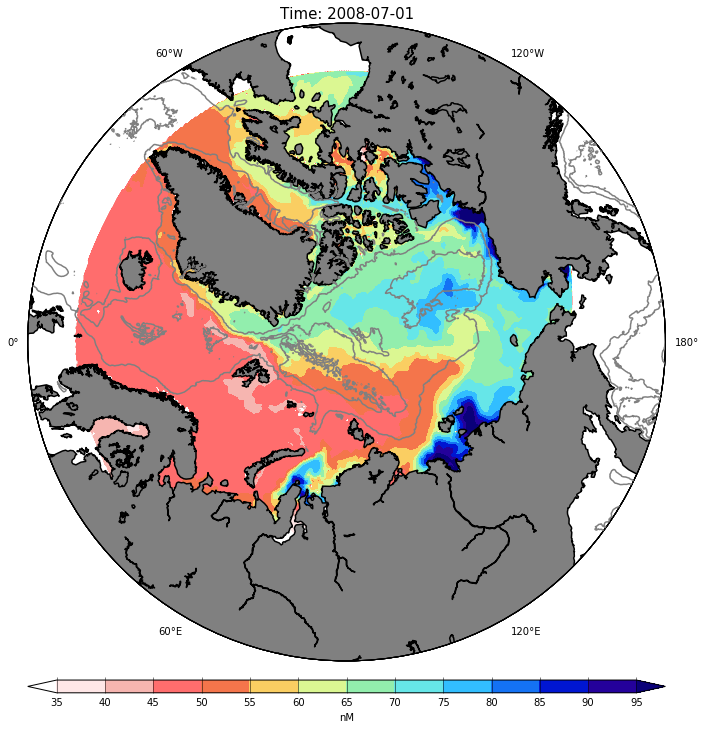

In [31]:
for i in range(72, 79):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca()
    CS, proj = plot_Ba(i, ax)
    
CBar=proj.colorbar(CS, location='bottom', size='2%', pad='3%', ticks=lev1)
CBar.set_label('nM', fontsize=10)
CBar.ax.tick_params(axis='x', length=16)